# Diabetes Risk: Predicting Diabetes Prevalence Through Deep Learning
---

### 1 Introduction

---
#### 1.1 Overview

Diabetes is a metabolical disorder that impacts individual's blood sugar levels. This is often due to the inability to produce or utilize insulin. Dibetes has become quite prevalent in the modern world, given the changes in diets, the prevelance of other diseases, and and many other possible external factors. However, based on known and presumed risks for diabetes, it would be useful to know if these types of risks can be detected to predict whether one is proned to having diabetes or not. To understand this topic further, it is essential to apply unsupervised learning, via clustering models, such as K-Means Clustering and Hierarchical Clustering.


#### 1.2 Goal

As an individual who has predisposition to diabetes via genetics, it is essential to understand the potential risk that may predict diabetes, as well as understand the risks that come from having diabetes. By being able to group and identify those proned to diabetes, based on potential diabetes risks, it will enable for better awareness and long term preventative care. To approach this problem, it is essential to evaluate different clustering approaches, to determine what model would best predict diabetes, given the presence of certain factors. The main clustering approaches that will be investigated in this will be Hierarchical Clustering via Agglomerative Clustering and K-Means Clustering.

#### 1.3 About the Data

**1.3.1 Load The Data**

In [32]:
import numpy as np # for statistical analysis
import pandas as pd # to data process and load csv.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import copy # to copy data as needed
import matplotlib.pyplot as plt # to create plots
import seaborn as sns # to visualize pairplots and correalation matrices
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv


In [2]:
# acquire the diabetes data
diabetes = pd.read_csv("/kaggle/input/diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv")

# print out top 5 data sets from diabetes
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
# print number of columns
print("Number of Columns:", 
      len(diabetes.columns))

#print number of rows
print("Number of Rows:", 
      len(diabetes))

Number of Columns: 17
Number of Rows: 520


**Observations:** Just from a glance, this data evidently showcases that every variable is a binary classification, except for `Age`. Given that the main focus is determining how risk factors can predict diabetes, it is essential to allocate `class` as the response variable. This is because `class` is classifies of whether an individual has diabetes or not, will be the response factor for the multi-linear regression. Another thing to take note of is that every variable is non-numeric, meaning all the binary classification columns will need to be converted to binary values. There is also evidently 17 features and 520 observations.

**1.3.2 Data Source and Citation**

**_Citation:_**
Himanshu (rcratos).(n.d.). Diabetes Risk Prediction [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/rcratos/diabetes-risk-prediction

The dataset that was used is called the Diabetes Risk Prediction from Kaggle. It can be found from the [Data Risk Prediction](https://www.kaggle.com/datasets/rcratos/diabetes-risk-prediction/data) page, which is cited in the link above. In this data, it provides information on individuals with different potential risk factors for diabetes, which could be used to decide risk predictions. 

**1.3.3 Data Description**

This data overall provides information on individuals and whether they have acquired the potential risk factors of diabetes, as well as whether they have diabetes themselves.

This data consists of is 520 rows and 7 columns. Here are all the features of this data and what they are:

- **Age**: The age of the individual. (Numeric)
- **Gender**: The gender of the individual. (Categorical: Male or Female)
- **Polyuria**: A common diabetes symptom in which an individual urinates excessively. (Binary Classification: Yes or No)
- **Polydipsia**: A common diabetes symptom in which an individual is excessively thirsty. (Binary Classification: Yes or No)
- **Sudden weight loss**: A diabetes symptom when an individuals experiences severe unexplained weight loss, which can be a sign of diabetes. (Binary Classification: Yes or No)
- **Weakness**: A sign of the individual experiences physical weakness 
- **Polyphagia**: A common diabetes symptom in which an individual is excessively hungry. (Binary Classification: Yes or No)
- **Genital thrush**: A yeast infection that causes irritation in the genital area. (Binary Classification: Yes or No)
- **Visual blurring**: A loss or blur in vision (Binary Classification: Yes or No)
- **Itching**: Whether an individual experiences itching or irritation. (Binary Classification: Yes or No)
- **Irritability**: Whether the individual experiences irritability or not. (Binary Classification: Yes or No)
- **Delayed healing**: Whether the individual experiences slow healing of wounds.(Binary Classification: Yes or No)
- **Partial paresis**: A symptom of diabetes in which there is partial loss of voluntary movement. (Binary Classification: Yes or No)
- **Muscle stiffness**: Whether the individual experiences muscle stiffness. (Binary Classification: Yes or No)
- **Alopecia**: Whether the individual suffers from hair loss. (Binary Classification: Yes or No)
- **Obesity**: Whether the individual is obese or not (Binary Classification: Yes or No)
- **Class**: Whether the individual has diabetes or not (Binary Classification: Yes or No)

This data will be used to evaluate vital symptoms/risks that contribute to diabetes, as well as predict causes of diabetes risk/risk factors that come from diabetes.


### 2 Data Cleaning

--- 
#### 2.1 Data Exploration

The first part of the exploratory data analysis, is to determine what kind of data is being used in this investigation. It is also important to evaluate any important parts of the data that may need to be processed. For this first part, it would be good to make sure the data reflects the data type they are described to be. Then it will be useful to know whether there are null values that may need to be preprocessed before analysis. Given that clustering and dimenstionality reduction will be modeled, it is essential to evaluate normalizing the data. The reason is it will accomodate for equal contribution from all the features, especially for evaluating distance metrics in clustering and reducing dimensions with Non-Negative Matrix.

**2.1.1: Types of Usable Data**

In [4]:
# print out top 5 data sets from diabetes
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Observations:** Based on this table, there is evidently categorical data that need to be converted to binary values, especially when it comes to any feature aside from "Age".

In [5]:
# print information on the datasets
# check for null values
print("Diabetes Information")
print(diabetes.info(), "\n")

Diabetes Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class

**Observations:** Based on the `Diabetes Information` above, it is evident that age is the only numeric variable present in the data, which means every other column needs to be converted into binary values.

**2.1.2: Evaluate Potential Need To Remove Null Values**

In [6]:
# print number sum of null values present in each column
print("Diabetes Information: Null Values")
print(diabetes.isnull().sum(), "\n")

Diabetes Information: Null Values
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64 



**Observations:** For the `Diabetes Information: Null Values` table, there are no null variables to extract, which means this data has been processed to not include null values.

**2.1.3: Evaluate Potential Need For Normalization**

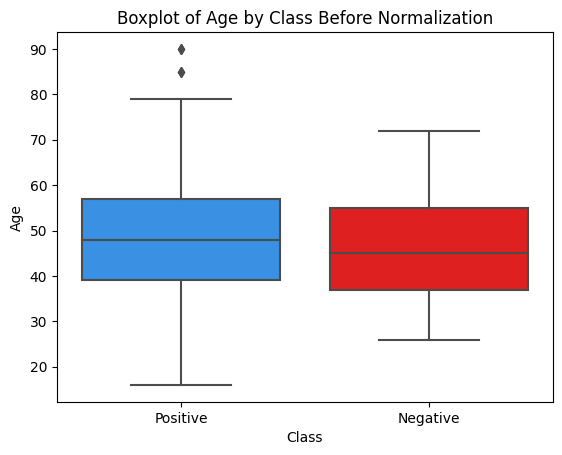

In [7]:
# visualize box plots for "age" relative to class before normalization
sns.boxplot(x = "class", y = "Age", 
            data = diabetes, palette = ["dodgerblue", "r"])
plt.xlabel("Class")
plt.ylabel("Age")
plt.title("Boxplot of Age by Class Before Normalization")
plt.show()

**Observations:** According to the boxplot, despite having different medians between classes, the boxplot size seems to look the same size, suggesting it might already be normalized.

**Suggestions for Pre-Processing:** The data evalution suggests there are no null values to remove from the data for any features. However, the data itself suggests that data need to be converted to binary values before conducting exploratory data analysis. The boxplot for `Age` suggest there may not be a need to standardize the `Age` feature, but  for safe measures, it will still be best to normalize the data.

#### 2.2 Pre-Process Data for Exploratory Analysis

**2.2.1 Approach** 

To get started in further understanding that data at hand, it is vital to ensure the data is useable for the process. The first step is to convert all binary categorical labels into values. The following will be done to the labels: {`Yes = 1`, `No = 0`}, {`Male = 1; Female = 0`}, and {`Positive = 1; Negative = 0`}. Furthermore, it is essential to normalize the data, in case it has not been. From the looks of the Boxplot before, it is possible this data is already standardized for analysis. The last thing is to ensure the data is reduced enough to where only important features are referenced for non-negative factorization to avoid the curse of dimensionality.

**2.2.2 Reassigning Categorical Data to Binary Values** 

In [8]:
# acquire the binary categorical variables and convert to numeric
# select all yes or no binary classifications; not age, gender, and class
bi_col = diabetes.columns.drop(["Age", "Gender", "class"])
# create new diabetes dataframe with new values
db = diabetes.copy()
# ensure yes = 1; no = 0
db[bi_col] = db[bi_col].apply(lambda x: x.map({"Yes": 1,
                                               "No": 0}))
# ensure male = 1; female = 0
db["Gender"] = db["Gender"].map({"Male": 1,
                                 "Female": 0})
# ensure positive = 1; negative = 0
db["class"] = db["class"].map({"Positive": 1,
                               "Negative": 0})
# make sure the new data no longer has the labels
db

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


**2.2.3 Normalizing the Data** 

To ensure that the data will be usable for clustering and dimension reduction, normalizing the dataset will still be conducted.

In [9]:
# isolate age
age = ["Age"]

# conduct Standardization using StandardScalar()
scaler = StandardScaler()
# reassign the normalized data into the age column
db[age] = scaler.fit_transform(db[age])
# display db
db

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.743741,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,-0.002376,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.821362,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,-1.320358,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


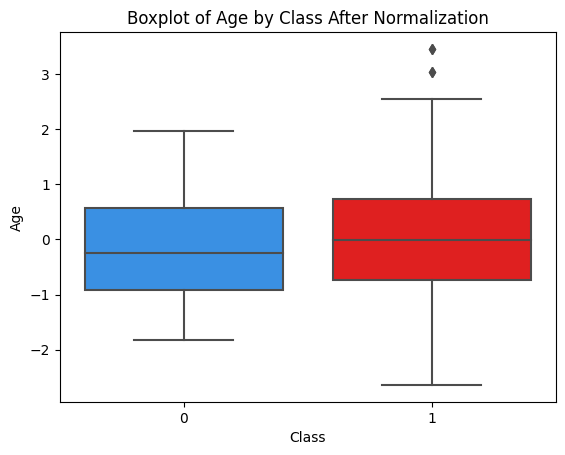

In [10]:
# visualize box plots for "age" relative to class before normalization
sns.boxplot(x = "class", y = "Age", 
            data = db, palette = ["dodgerblue", "r"])
plt.xlabel("Class")
plt.ylabel("Age")
plt.title("Boxplot of Age by Class After Normalization")
plt.show()

**Observations:** From comparing the looks of both the before and normalized data, it appears that the data was shifted due to the normalization of the age column. From looking at the boxplot, the median of the non-diabetic boxplot shifted down, while also reducing the error.

Although age is adjusted for, it really does not make any sense to keep age, given it is not the focus feature of this research.


In [11]:
db1 = db.drop(columns = ["Age"])
db1

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


#### 2.3 Data Cleaning Overview

**Summary:** Overall, there was no null data points and the data was cleaned beforehand in that aspect. However, the data values were in strings for classification labels, so before proceeding to Exploratory Data Analysis, it was necessary to convert all the Yes or No; Male or Female, and Postive or Negative binary classifications into binary values. This will help allow for correlation matrices and any other exploratory analysis to occur. Data reduction was also conducted; however it seems that the data ideally has all the important features to keep. 

### 3 Exploratory Data Analysis (EDA)
In this portion, visualizations and analysis will be conducted in order to understand the data more and simplify the data further before modeling. The first part is to find correlations between the features, as well as have and idea of what kind of relationship each chosen feature has in relation to the diabetes classification.

#### 3.1 Data Statistics
This will allows for the understanding the demographics of who was being observed in this data set. This should not influence the prediction model but rather evaluate if the models later one can predict, even if the given demographics are different.

**3.1.1 Summary Statistics**

In [12]:
summary_stats = db1.describe()
print(summary_stats)

           Gender    Polyuria  Polydipsia  sudden weight loss    weakness  \
count  520.000000  520.000000  520.000000          520.000000  520.000000   
mean     0.630769    0.496154    0.448077            0.417308    0.586538   
std      0.483061    0.500467    0.497776            0.493589    0.492928   
min      0.000000    0.000000    0.000000            0.000000    0.000000   
25%      0.000000    0.000000    0.000000            0.000000    0.000000   
50%      1.000000    0.000000    0.000000            0.000000    1.000000   
75%      1.000000    1.000000    1.000000            1.000000    1.000000   
max      1.000000    1.000000    1.000000            1.000000    1.000000   

       Polyphagia  Genital thrush  visual blurring     Itching  Irritability  \
count  520.000000      520.000000       520.000000  520.000000    520.000000   
mean     0.455769        0.223077         0.448077    0.486538      0.242308   
std      0.498519        0.416710         0.497776    0.500300    

**3.1.1 Pie Chart: Viualization of Summary Statistics**

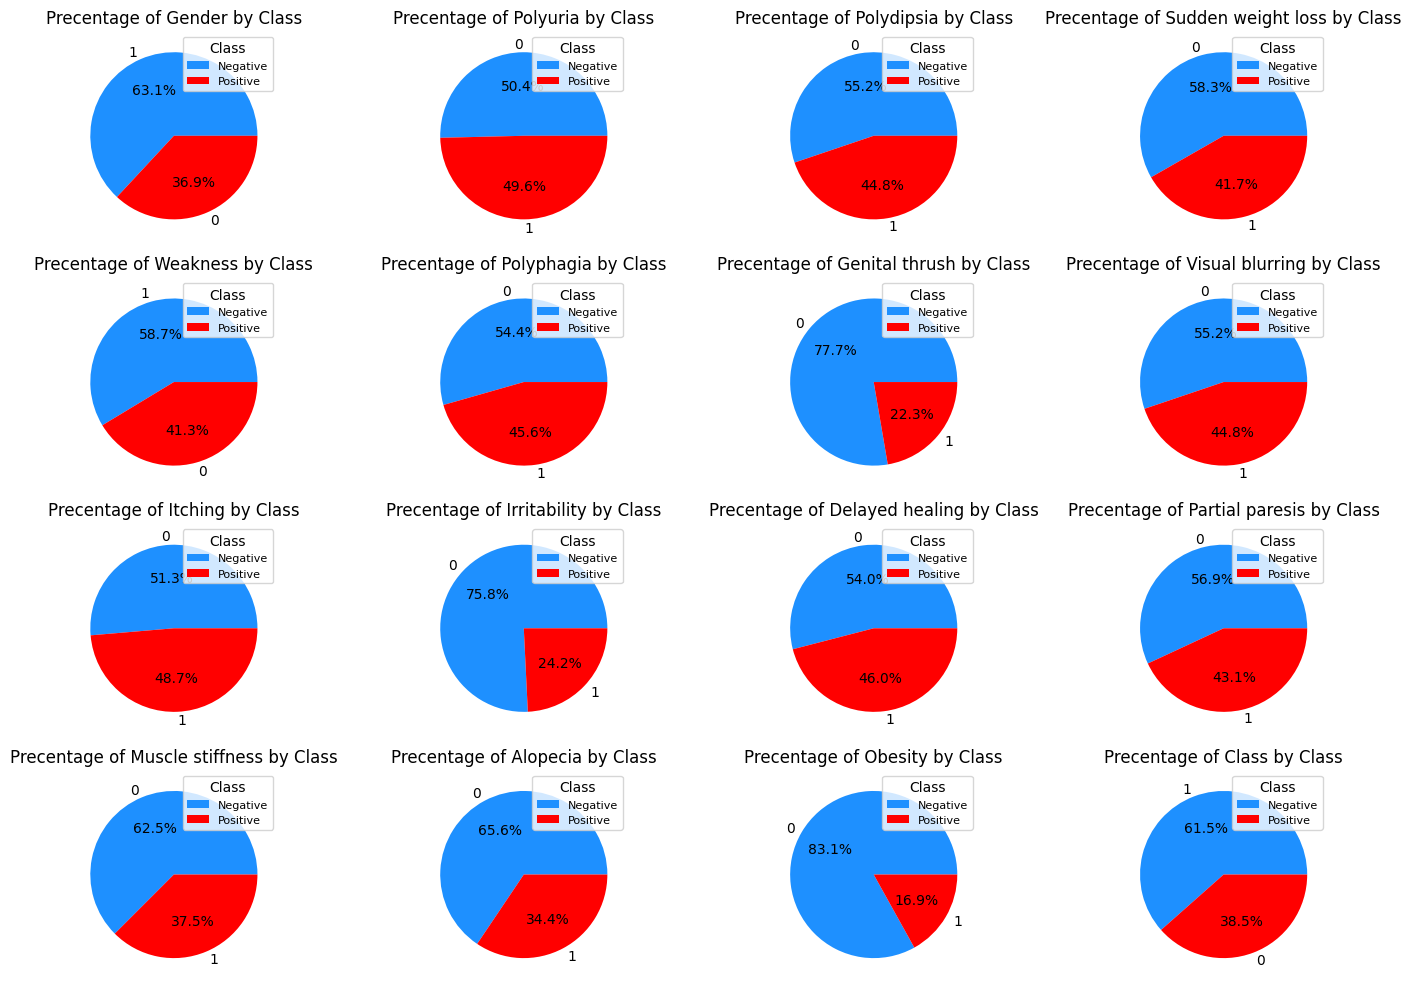

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find every column feature, except "Age"
bi_col = [col for col in db1.columns]

# Create subplots with a layout of 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(15, 10))

# iterate through each column feature to create a pie chart
for i, col in enumerate(bi_col):
    # within the figure dimension
    dim = axes[i//4, i%4]
    # get count of each plot by class
    class_counts = db[col].value_counts()
    
    # Plot the pie chart
    dim.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=["dodgerblue", "r"])
    dim.set_title(f"Precentage of {col.capitalize()} by Class")
    dim.legend(title = "Class", 
               loc = "upper right", 
               labels=["Negative", "Positive"], 
               prop={"size": 8})
        
plt.tight_layout()
plt.show()

**Observations:** Based on the summary and the pie chart visualization, this demonstrates the overall make-up of the observations in the data set. The composition of each treat overall that the majority of the individuals in the dataset have traits of : 
- **Gender**: 63.1% Male; 36.9% Female = Male
- **Polyuria**: 50.4% Yes; 49.6% No = No Polyuria
- **Polydipsia**: 55.2% Yes; 44.8% No = No Polydipsia
- **Sudden weight loss**: 58.3% Yes; 41.7% No = No sudden weight loss
- **Weakness**: 58.7% Yes; 41.3% No = No sudden weight loss
- **Polyphagia**: 54.4% Yes; 45.6% No = No Polyphagia
- **Genital thrush**: 77.7% Yes; 22.3% No = No genital irritation from yeast infection
- **Visual blurring**: 55.2% Yes; 44.8% No = No Polyphagia
- **Itching**: 51.3% Yes; 48.7% No = No itching
- **Irritability**: 75.8% Yes; 24.2% No = No irritability
- **Delayed healing**: 54.0% Yes; 46.0% No = No slow healing
- **Partial paresis**: 56.9% Yes; 43.1% No = No loss of movement
- **Muscle stiffness**: 62.5% Yes; 37.5% No = No muscle stiffness
- **Alopecia**: 65.6% Yes; 34.4% No = No hair loss
- **Obesity**: 83.1% Yes; 16.9% No = No obesity
- **Class**: 61.5% Yes; 38.5% No = No diabetes.

**Observations:** Since the dataset in general does not demonstrate the individuals selected to be mainly diabetic or those with risk of diabetes, this suggests the data is not biased towards selecting diabetic individual and the diabete risks. Although this does not appear to favor diabetes, it shows that the data potentially can help categorize the data in modeling more accurately without bias.

To further evaluate this, it is best to see the breakdown of each feature in respect to `class`.

#### 3.2 Evaluate via Visualizations

**3.2.1 Bar Pot Comparisons**

It is uncertain whether the composition of the data will effect the model, so it is best to identify which feature trait of risk is found in those with diabetes. Use barplot to distinguish each binary category to each class.

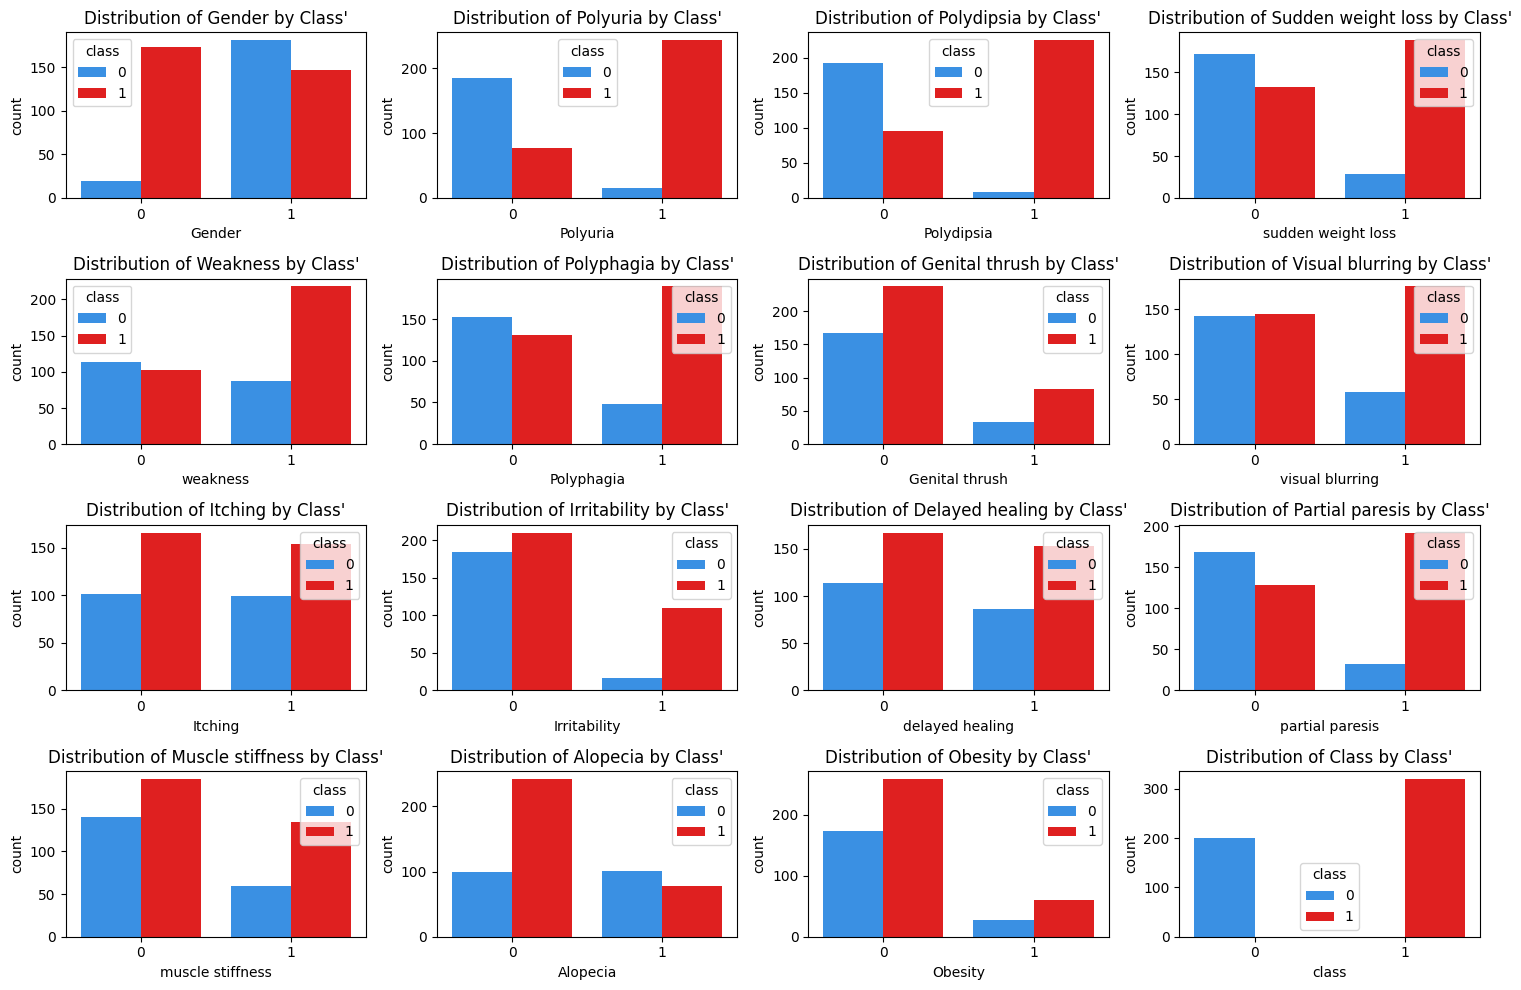

In [14]:
# conduct count plot for each binary category; exclude age
# find every column feature, except age
bi_col = [col for col in db1.columns]
bi_col

# visualize bar plots for binary variables, relative to class
fig, axes = plt.subplots(4, 4, 
                         figsize=(15, 10))

# iterate through each column feature to creat bar plot
for i, col in enumerate(bi_col): # exclude age
    # within the figure dimension
    dim = axes[i//4, i%4]
    # creat count plot by class
    sns.countplot(x = col, hue = "class", 
                  data = db, ax = axes[i//4, i%4], 
                  palette = ["dodgerblue", "r"])
    dim.set_title(f"Distribution of {col.capitalize()} by Class'")
    
plt.tight_layout()
plt.show()

**Observations:** Based bar plot visualization, this demonstrates the overall make-up of the observations in the data set. Diabetics were more likely to: 
- **Gender (Key: Male = 1, Female = 0)**: Be Female
- **Polyuria (Key: Yes = 1, No = 0)**: Have Polyuria
- **Polydipsia (Key: Yes = 1, No = 0)**: Have Polydipsia
- **Sudden weight loss (Key: Yes = 1, No = 0)**: Have sudden weight loss
- **Weakness**: 58.7% Yes; 41.3% No = No sudden weight loss
- **Polyphagia (Key: Yes = 1, No = 0)**: Have Polyphagia
- **Genital thrush (Key: Yes = 1, No = 0)**: Have  genital irritation from yeast infection
- **Visual blurring (Key: Yes = 1, No = 0)**: Have  Polyphagia
- **Itching (Key: Yes = 1, No = 0)**: Have itching
- **Irritability (Key: Yes = 1, No = 0)**: Have irritability
- **Delayed healing (Key: Yes = 1, No = 0)**: Have slow healing
- **Partial paresis (Key: Yes = 1, No = 0)**: Have loss of movement
- **Muscle stiffness (Key: Yes = 1, No = 0)**: Have muscle stiffness
- **Alopecia (Key: Yes = 1, No = 0)**: Have hair loss
- **Obesity (Key: Yes = 1, No = 0)**: Have obesity

**Class** could not be evaluated due to it being compared to itself.

**Observations:** The data suggest that class can evaluate by different binary categories, in order to identify who will have diabetes and who will not. In result, modeling this via dimensional and clustering can help create a prediction utilizing this structure of categorization.

**3.2.2 Correlation Matrix**

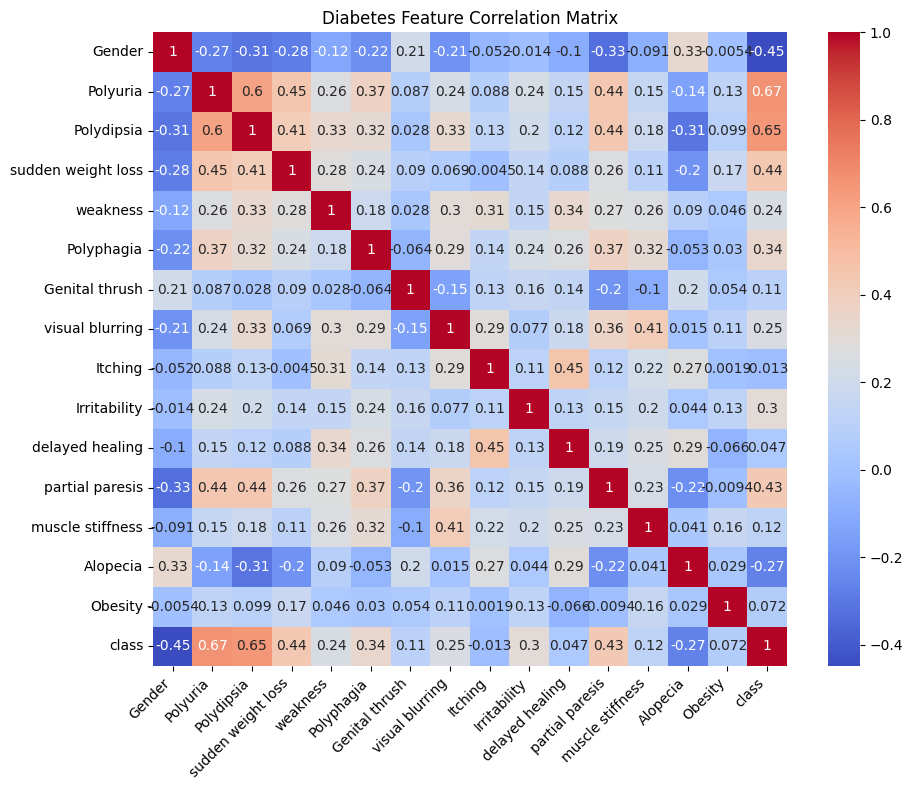

In [15]:
# compute
corr = db1.corr()

# create a heatmap on what variables are correlated to diabetes based on gender/age
plt.figure(figsize=(10, 8))
# create heatmap from sns library
sns.heatmap(corr, annot = True, # include correlation values
            cmap = "coolwarm", 
            square = True)
plt.title('Diabetes Feature Correlation Matrix')
plt.xticks(rotation = 45, 
           ha='right')
plt.tight_layout()  # ensure the data is not too big
plt.show()

**Observations:** Based on the evaluation of this data, it seems the variables that have the highest correlation, relative to `class`, would be primarily `Polyuria` and `Polydipisia`. However, the lowest risks variables for having diabetes would be, `Genital thrush`, `visual blurring`, `itching`, `weakness`, `delayed healing`, `muscle stiffness`, `Alopecia`, and `Obesity`. Looking at the values present, it seems that majority of the variables, except for `Polyuria` and `Polydipsia`, were lower than a correlation of 0.5. This indicates that class does not have a strong correlation with majority of the features, but it is worth taking notice of these two features for analysis. This means there must be other means to extract important features. This might be done through random forest.

Note: Since the relationship betweenthe variables seem independent, it is probably best to utilize FNN, but CNN can be tested just in case.

### 4 Data Pre-Processing

---

#### 4.1 Pre-Processing Test and Train Data for Feature Selection
Given the relationship between features are unknown, features need to be selected via importance. The correaltion matrix was not useful in this case.

**4.1.1 Assign X and Y Data**

In [16]:
# assign class as response variable, and the rest into X
X_rf = db1.drop(columns = ["class"])  # features
y_rf = db1["class"]  # target variable

# display X variable
X_rf

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


**4.1.2 Convert Train Data Into Train and Validation Data**

In [17]:
# now split data using train_test_split; make sure 20% goes to test data
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(X_rf, y_rf, 
                                                            test_size = 0.2, 
                                                            shuffle = True,
                                                            random_state = 42) # for reproducibility  

#### 4.2 Feature Selection

**4.2.1 Model Random Forest**

Given the uncertainty of which features to select, based on the correlation, it is best to consdier selecting the features, based on importance.
This is where Random Forest Classifier comes in.

In [18]:
# build a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# train the classifier on the training data
rf_classifier.fit(Xrf_train, yrf_train)

# predict the values from Random Forest Classifier
yrf_pred = rf_classifier.predict(Xrf_test)

# evaluate how accurate the model is to make sure it is fine to use for feature selecting
accuracy = accuracy_score(yrf_test, yrf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9711538461538461


**Observations:** Given the accuracy was 0.97, it is evident that the model is a reliable model. Therefore, it is safe to utilize for feature selection.

**4.2.2 Random Forest Classifier Feature Selection**

Here are the top Features to use for this data set.

In [19]:
# acquire feature importances
feat_imp = rf_classifier.feature_importances_

# create a DataFrame to display feature importances
imp_df = pd.DataFrame({"Feature": X_rf.columns, 
                       "Importance": feat_imp})
# sort the values by importance
imp_df = imp_df.sort_values(by = "Importance",
                            ascending=False)

# display the rank of features
print(imp_df)

               Feature  Importance
1             Polyuria    0.228019
2           Polydipsia    0.182113
0               Gender    0.086243
3   sudden weight loss    0.078576
11     partial paresis    0.053260
8              Itching    0.046500
7      visual blurring    0.045923
13            Alopecia    0.044136
9         Irritability    0.044097
10     delayed healing    0.037815
5           Polyphagia    0.036241
4             weakness    0.034729
12    muscle stiffness    0.032030
6       Genital thrush    0.030695
14             Obesity    0.019622


**Observations:** The top 5 features that the Randomf Forest Classifier selcted were `Polyuria`, `Polydipsia`, `Gender`, `sudden weight loss` and `partial paresis.`

Based on these results, those are the features being selected for the CNN and FNN approach for deep learning.

#### 4.3 Final Data for CNN and FNN Models

**4.3.1 Ressign X and Y Data to New Feature Selection**

In [20]:
# assign class as response variable, and the rest into X
X = X_rf.copy()
X = X[["Polyuria", "Polydipsia", "Gender", "sudden weight loss", "partial paresis"]]
y = db1["class"]  # target variable

# display X variable
X

,Polyuria,Polydipsia,Gender,sudden weight loss,partial paresis
0,0,1,1,0,0
1,0,0,1,0,1
2,1,0,1,0,0
3,0,0,1,1,0
4,1,1,1,1,1
...,...,...,...,...,...
515,1,1,0,1,1
516,1,1,0,1,1
517,1,1,0,1,1
518,0,0,0,0,0


**4.3.2 Convert Train Data Into Train and Validation Data for Modeling**

In [21]:
# now split data using train_test_split; make sure 20% goes to test data
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size = 0.2, 
                                                  shuffle = True,
                                                  random_state = 42) # for reproducibility  

#### 3.3 EDA Overview

**Summary:** Overall, the corelation matrices/ and Random Forest Classifier determined that `Age`, `class`, `gender`, `Polyuria`, `Polydipsia`, `sudden weight loss`, and `partial paresis` would be the ideal data features to analyze for modeling
### 4 Modeling Architecture

---

#### 4.1 Building a CNN Model
The neural network architecture needs to be identified before learning. The reason is it is the structure in which the deep learning will occur. Without model architecture, the ability to learn is non-existent. Although given that the variables are not dependent or sequential, utiliizing this model may not be the best. However, it would intersting to put this up to the test against FNN.

For CNN, they require convulution 2D operations , downsampling feature maps, and flaten layer output into 1 dimensional vectors. The layers are connected so `Dense`. Overall, this model requires:
- `Conv2D`
- `MaxPooling2D`
- `Flatten`
- `Dense`


In [22]:
# Create CNN model with 1D convolutional layers
# model_cnn = Sequential([
#     Conv1D(32, 3, activation = "relu", input_shape=(X.shape[1], 1)),
#     MaxPooling1D(2),
#     Conv1D(64, 3, activation = "relu"),
#     MaxPooling1D(2),
#     Flatten(),
#     Dense(64, activation = "relu"),
#     Dense(1, activation = "sigmoid")
# ])

**Observation** CNN is not compatible with this type of data. It requires layers.

#### 4.2 Build The FNN Model
The other neural network approach is FNN. FNN predominantly used to deal with independent features that does not have the sequential or temporal requirements for modeling. Given the dataset has features that are not correlated or sequential, this is the best model. Hopefully the result portray the same thing.

In [23]:
# create FNN model
model_fnn = Sequential([
    Dense(512, activation = "relu", input_dim = X_train.shape[1]),
    Dense(512, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 5 Model Analysis

---

#### 5.1 Training and Validation

**5.1 Compile, Train and Validate The Model**

Compiling is used to ensure optimization whenever errors are faced throughout the learning process. In result, this must be implemented before the learning process can begin. The things to accomodate for are optimization appraoch, loss function, and evaluation metrics. The one selected in this model are:

- `adam`: Picked due to it's balance of both AdaGrad and RMS Prop
- `binary_crossentropy`: Picked due to the use of binary categories of 0 and 1 (Yes or No; Male or Female)
- `accuracy`: Picked because it ensures whether the model can predict well or not, compared to original labels.

In [24]:
# compile the cnn model
# model_cnn.compile(optimizer = "adam", 
#                   loss = "binary_crossentropy", 
#                   metrics = ["accuracy"])

# train the model, this will provide the history of the data; to plot later
# hist_cnn = model_fnn.fit(X_train, y_train, 
#                          batch_size = 128, epochs = 14, 
#                          validation_data = (X_val, y_val))

**Observation** It fails because CNN is not compatible with this type of data. It requires layers.

In [25]:
# compile the cnn model
model_fnn.compile(optimizer = "adam", 
                  loss = "binary_crossentropy", 
                  metrics = ["accuracy"])

# train the model, this will provide the history of the data; to plot later
hist_fnn = model_fnn.fit(X_train, y_train, 
                         batch_size = 128, epochs = 14, 
                         validation_data = (X_val, y_val))

Epoch 1/14
1/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3672 - loss: 0.7089

I0000 00:00:1714761214.158798    4834 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714761214.172461    4834 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.5194 - loss: 0.6506 - val_accuracy: 0.8654 - val_loss: 0.4404
Epoch 2/14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8106 - loss: 0.4545 - val_accuracy: 0.8750 - val_loss: 0.3389
Epoch 3/14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8682 - loss: 0.3365 - val_accuracy: 0.9231 - val_loss: 0.2851
Epoch 4/14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8859 - loss: 0.2862 - val_accuracy: 0.9038 - val_loss: 0.2536
Epoch 5/14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8987 - loss: 0.2473 - val_accuracy: 0.9038 - val_loss: 0.2359
Epoch 6/14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8932 - loss: 0.2435 - val_accuracy: 0.9038 - val_loss: 0.2291
Epoch 7/14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8963 - loss: 0.2505 - val_accuracy: 0.9231 - val_loss: 0.2165
Epoch 8/14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8936 - loss: 0.2598 - val_accuracy: 0.9231 - val_loss: 0.2125
Epoch 9/14


#### 5.2 Predict the Model
**5.2.1: Predictions**

In [26]:
# predictions on test set
pred_fnn = model_fnn.predict(X_val)
pred_fnn[0:10]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


W0000 00:00:1714761217.675824    4834 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[0.6137296 ],
       [0.9996771 ],
       [0.99288106],
       [0.996354  ],
       [0.8210204 ],
       [0.99993885],
       [0.8210204 ],
       [0.0905729 ],
       [0.4993974 ],
       [0.07380871]], dtype=float32)

#### 5.3 Training and Validation Visualizations
**5.3.1 Training and Validation Accuracy Plot for CNN**

Let's check to make sure the model's accuracy increases as it should.

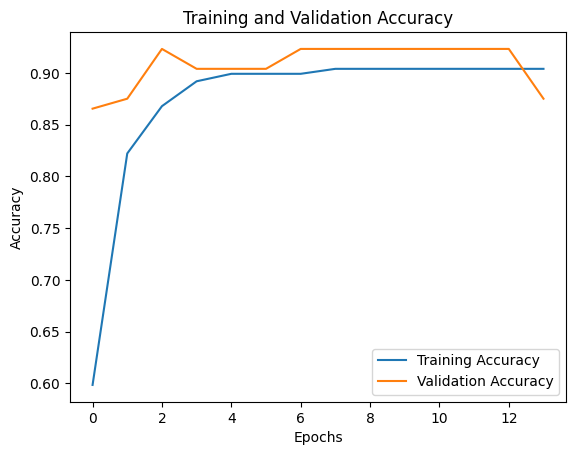

In [27]:
# plot training and validation accuracy for CNN Model
plt.plot(hist_fnn.history["accuracy"], label = "Training Accuracy")
plt.plot(hist_fnn.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**5.3.2 Training and Validation Loss Plot**

Let's check to make sure the model's loss is decreasing over time or not.

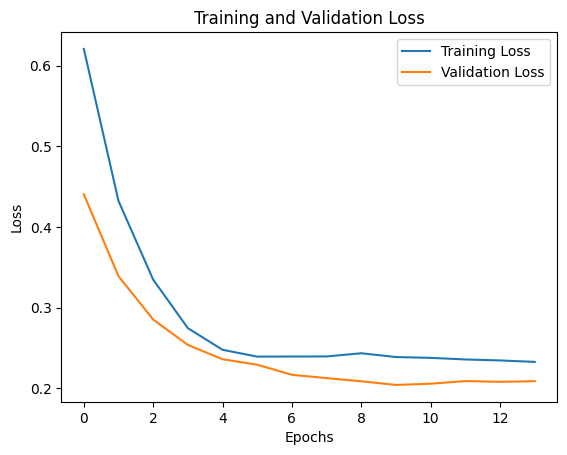

In [37]:
# lot training and validation loss for CNN model
plt.plot(hist_fnn.history["loss"], 
         label = "Training Loss")
plt.plot(hist_fnn.history["val_loss"], 
         label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Observations** Based on loss plots, it is evident from the validation data the model is overfitted.

## 6 Visualizations

---

### 6.1 Bar Plot of FNN Model

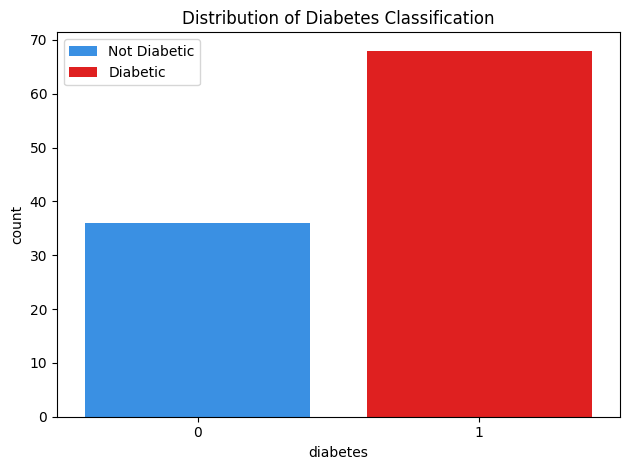

In [36]:
# create count plot to demonstrate structure of the tweets train dataset
# use sns to plot count plot
# probabilities into binary values
binary_pred_fnn = (pred_fnn >= 0.5).astype(int)

# create a data frame
pred_fnn_bi_df = pd.DataFrame(binary_pred_fnn, 
                              columns=["diabetes"])

sns.countplot(x = "diabetes", hue = "diabetes", 
              data = pred_fnn_bi_df, 
              palette = ["dodgerblue", "r"],
              dodge = False) # center the bars
plt.title(f"Distribution of Diabetes Classification")
plt.legend(["Not Diabetic", "Diabetic"])
plt.tight_layout()
plt.show()

**Observation:** FNN predicted more individuals would be diabetic given a combination of the features. This demonstrates that the features have qualites to be risks for diabetes. This suggests that FNN can predict whether diabetes from what features are present.

#### 6.2 Confusion Matrix, Accuracy

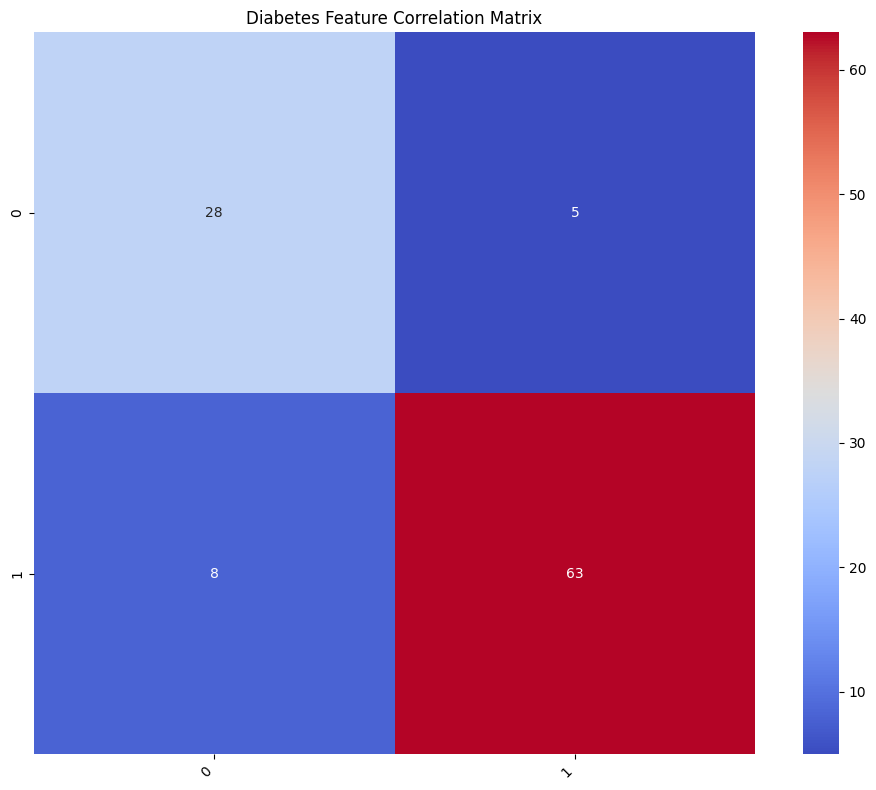

Accuracy of FNN Model: 0.875


In [35]:
# probabilities into binary values
binary_pred_fnn = (pred_fnn >= 0.5).astype(int)

# create confusion matrix
conf_matrix = confusion_matrix(y_val, 
                               binary_pred_fnn)


# create a heatmap on what variables are correlated to diabetes based on gender/age
plt.figure(figsize=(10, 8))
# create heatmap from sns library
sns.heatmap(conf_matrix, annot = True, # include correlation values
            cmap = "coolwarm", 
            square = True)
plt.title('Diabetes Feature Correlation Matrix')
plt.xticks(rotation = 45, 
           ha='right')
plt.tight_layout()  # ensure the data is not too big
plt.show()

accuracy = accuracy_score(y_val,
                          binary_pred_fnn)

print("Accuracy of FNN Model:", accuracy)

**Observations:** Similar to the bar plot, the model kept guessing true. The only issue is that the model over assumed everything is true, meaning the assumption from the bar plot is incorrect. This model needs to have more training on what are true diabete risk factors and what are not.

### 7 Results and Analysis

---

#### 7.1 Results
Based on the visualizations via Validation and Training Accuracy and Loss Plot, there seems to be an indication that the model was able to predict diabetes from the selected diabetes risk factors. Furthermore, from the loss model, there is evidently a learning curve , given that both training and validation loss decreased.

As for the barplot it was evident that the model predicted diabetes more than not, when it came to those features. This indicates the model was able to predict the risk fo having diabetes being higher, based on the count of individuals displaying the selected features. For confusion matrix, the model was able to predict a lot more True Positives and True Negatives.

Lastly, according to the model accuracy, the model had an accuracy of only 0.875, which means the model is decent. 

#### 7.2 Analysis
Based on these results, it is evident the FNN model was a good fit for the data. This could be due to the way the model able to predict somewhat accurately of who was diabetes proned and who wasn't based on the given conditions. In respect to data, even though there were five uncorrelated variables selected as features for this model, it is evident FNN succesfully could model the data. This proves that FNN is agreat model to use on unrelated features in a dataset. 

### 8 Closing 

---

#### 8.1 Things to Improve
Given the accuracy was at 0.875, this implies the model is not optimal yet, so adjustments may need to be made for this data set. This could be via means of adjusting the layers and hyperparameters. Another way to adjust is to reconsider what other features to select or remove from the model.

#### 8.2 Conclusion
In conclusion, it is evident that FNN model in deep learning was the best model in this data; and diabetes can be predicted through risk factors ,, such as, `Polyuria`, `Polydipsia`, `Gender`, `sudden weight loss` and `partial paresis`. Although the model is not perfect, there is potential for the model to be sufficent in predicting diabetes in the long run.

### 8.3 Sources

**8.3.1: Citations**

Will Cukierski. (2018). Histopathologic Cancer Detection. Kaggle. https://kaggle.com/competitions/histopathologic-cancer-detection

The dataset that was used is called the Histopathologic Cancer Detection from Kaggle. It can be found here page, which is cited in the link above. In this data, it provides pathology images of tumors.

**8.3.2** Github
Github Link | https://github.com/kpnguyenco/Deep-Learning-Data-Analysis-Diabetes-Risk